In [1]:
#Reading the data
df <- read.csv('/Users/raviswanath/Downloads/LoanStats3a.csv', skip = 1)

In [2]:
head(df, 3)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
,NA,5000,5000,4975,36 months,10.65%,162.87,B,B2,⋯,NA,NA,Cash,N,,,,NA,NA,NA
,NA,2500,2500,2500,60 months,15.27%,59.83,C,C4,⋯,NA,NA,Cash,N,,,,NA,NA,NA
,NA,2400,2400,2400,36 months,15.96%,84.33,C,C5,⋯,NA,NA,Cash,N,,,,NA,NA,NA


Loads of rows and columns with lots of visinble NA's. Lets get going and start with the cleaning process!

## Data cleaning and exploration

In [3]:
str(df)

'data.frame':	42538 obs. of  145 variables:
 $ id                                        : Factor w/ 4 levels "","Loans that do not meet the credit policy",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ member_id                                 : logi  NA NA NA NA NA NA ...
 $ loan_amnt                                 : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt                               : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv                           : num  4975 2500 2400 10000 3000 ...
 $ term                                      : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                                  : Factor w/ 395 levels "","  5.42%","  5.79%",..: 80 223 241 162 137 30 241 324 372 137 ...
 $ installment                               : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                                     : Factor w/ 8 levels "","A","B","C",..: 3 4 4 4 3 2 4 6 7 3 ...
 $ sub

In [4]:
summary(df)

                                               id        member_id     
                                                :42535   Mode:logical  
 Loans that do not meet the credit policy       :    1   NA's:42538    
 Total amount funded in policy code 1: 460296150:    1                 
 Total amount funded in policy code 2: 0        :    1                 
                                                                       
                                                                       
                                                                       
   loan_amnt      funded_amnt    funded_amnt_inv         term      
 Min.   :  500   Min.   :  500   Min.   :    0             :    3  
 1st Qu.: 5200   1st Qu.: 5000   1st Qu.: 4950    36 months:31534  
 Median : 9700   Median : 9600   Median : 8500    60 months:11001  
 Mean   :11090   Mean   :10822   Mean   :10140                     
 3rd Qu.:15000   3rd Qu.:15000   3rd Qu.:14000                     
 Max.   :35000  

From the structure and summary, it is clear that many of the columns are all out NA's. Lets remove those first.

In [5]:
# a function that will be immensly helpful here, is.na()
sum(!is.na(df[, 2]))
#This code snippet sums non-NA vales in the asked column. 

[1] 0

Lots of columns have no single data entry! Let's make a loop and indeitfy such columns and then remove them first. 

In [6]:
a<- list() #empty list

In [7]:
for (i in colnames(df)){ 
    if(sum(!is.na(df[,i])) == 0){
        a <- c(a, i)
    }
}

In [8]:
head(a)

[[1]]
[1] "member_id"

[[2]]
[1] "url"

[[3]]
[1] "mths_since_last_major_derog"

[[4]]
[1] "annual_inc_joint"

[[5]]
[1] "dti_joint"

[[6]]
[1] "verification_status_joint"

In [9]:
length(a)

[1] 81

Out of the 145 columns in the data set provided, 81 columns have just NA's and nothing!!

In [10]:
# simple way to discard columns 
df <- df[, !(names(df) %in% a)]

In [11]:
#lets check the data frame again. 
str(df)

'data.frame':	42538 obs. of  64 variables:
 $ id                        : Factor w/ 4 levels "","Loans that do not meet the credit policy",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ loan_amnt                 : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt               : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv           : num  4975 2500 2400 10000 3000 ...
 $ term                      : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                  : Factor w/ 395 levels "","  5.42%","  5.79%",..: 80 223 241 162 137 30 241 324 372 137 ...
 $ installment               : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                     : Factor w/ 8 levels "","A","B","C",..: 3 4 4 4 3 2 4 6 7 3 ...
 $ sub_grade                 : Factor w/ 36 levels "","A1","A2","A3",..: 8 15 16 12 11 5 16 22 28 11 ...
 $ emp_title                 : Factor w/ 30661 levels "","  old palm inc",..: 1 22922 1 791 28234 28965 2

Awesome, our looping technique worked! Still there are more variables which are absolutely crap. Let the cleaning continue!

In [12]:
summary(df)

                                               id          loan_amnt    
                                                :42535   Min.   :  500  
 Loans that do not meet the credit policy       :    1   1st Qu.: 5200  
 Total amount funded in policy code 1: 460296150:    1   Median : 9700  
 Total amount funded in policy code 2: 0        :    1   Mean   :11090  
                                                         3rd Qu.:15000  
                                                         Max.   :35000  
                                                         NA's   :3      
  funded_amnt    funded_amnt_inv         term          int_rate    
 Min.   :  500   Min.   :    0             :    3    10.99%:  970  
 1st Qu.: 5000   1st Qu.: 4950    36 months:31534    11.49%:  837  
 Median : 9600   Median : 8500    60 months:11001    13.49%:  832  
 Mean   :10822   Mean   :10140                        7.51%:  787  
 3rd Qu.:15000   3rd Qu.:14000                        7.88%:  742  
 Max.   

In [13]:
#These varibales have 40,000 + NA's or have the same information throughout. 
to_remove <- c('id', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'hardship_flag',
'disbursement_method', 'settlement_date',  'settlement_amount', 'settlement_percentage', 'settlement_term',
'debt_settlement_flag_date', 'settlement_status')

df <- df[, !(names(df) %in% to_remove)]

In [14]:
str(df)

'data.frame':	42538 obs. of  51 variables:
 $ loan_amnt               : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt             : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv         : num  4975 2500 2400 10000 3000 ...
 $ term                    : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                : Factor w/ 395 levels "","  5.42%","  5.79%",..: 80 223 241 162 137 30 241 324 372 137 ...
 $ installment             : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                   : Factor w/ 8 levels "","A","B","C",..: 3 4 4 4 3 2 4 6 7 3 ...
 $ sub_grade               : Factor w/ 36 levels "","A1","A2","A3",..: 8 15 16 12 11 5 16 22 28 11 ...
 $ emp_title               : Factor w/ 30661 levels "","  old palm inc",..: 1 22922 1 791 28234 28965 24627 17778 1 25138 ...
 $ emp_length              : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership         

Although not completley clean, this is a much better set to work with. Let's see how our dependent variable is doing.

In [15]:
str(df$loan_status)

 Factor w/ 5 levels "","Charged Off",..: 5 2 5 5 5 5 5 5 2 2 ...


In [16]:
print(summary(df$loan_status))

                                                    
                                                  3 
                                        Charged Off 
                                               5670 
Does not meet the credit policy. Status:Charged Off 
                                                761 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                         Fully Paid 
                                              34116 


In [17]:
df<- df[!(df$loan_status == ""), ]

Lets make this as a factor with only two options. If paid full, then 1, else 0.

In [18]:
#function to classify status of loan
status <- function(s){
    s <- as.character(s)
    if(s == 'Charged Off' | s == 'Does not meet the credit policy. Status:Charged Off'){
        return(0)
    }else if (s == 'Fully Paid'| s == 'Does not meet the credit policy. Status:Fully Paid'){
        return(1)
    }
}

#using sapply to apply the status function to the column. 
df$loan_status <- sapply(df$loan_status, status)
df$loan_status <- as.factor(df$loan_status)

In [19]:
#function to classify verification status
ver_status <- function(p){
  s <- as.character(p)
  if(p == 'Source Verified' | s == 'Verified'){
    return(1)
  }else{
    return(0)
  }
}

#using sapply to apply the status function to the column. 
df$verification_status <- sapply(df$verification_status, ver_status)
df$verification_status <- as.factor(df$verification_status)

In [20]:
summary(df$loan_status)

0     1 
 6431 36104

Let's be extra careful and drop the 3 unknown/other class of loan status.

In [21]:
df<- df[!(df$loan_status == 'Other'), ]

Let's now get back to our independent variables and see how much missing data is still there in our data set.

In [22]:
sum(is.na(df))

[1] 67633

That is huge! More cleaning to do!

In [23]:
summary(df)

   loan_amnt      funded_amnt    funded_amnt_inv         term      
 Min.   :  500   Min.   :  500   Min.   :    0             :    0  
 1st Qu.: 5200   1st Qu.: 5000   1st Qu.: 4950    36 months:31534  
 Median : 9700   Median : 9600   Median : 8500    60 months:11001  
 Mean   :11090   Mean   :10822   Mean   :10140                     
 3rd Qu.:15000   3rd Qu.:15000   3rd Qu.:14000                     
 Max.   :35000   Max.   :35000   Max.   :35000                     
                                                                   
    int_rate      installment          grade         sub_grade    
  10.99%:  970   Min.   :  15.67   B      :12389   B3     : 2997  
  11.49%:  837   1st Qu.: 165.52   A      :10183   A4     : 2905  
  13.49%:  832   Median : 277.69   C      : 8740   B5     : 2807  
   7.51%:  787   Mean   : 322.62   D      : 6016   A5     : 2793  
   7.88%:  742   3rd Qu.: 428.18   E      : 3394   B4     : 2590  
   7.49%:  656   Max.   :1305.19   F      : 1301   C1 

In [24]:
str(df)

'data.frame':	42535 obs. of  51 variables:
 $ loan_amnt               : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt             : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv         : num  4975 2500 2400 10000 3000 ...
 $ term                    : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                : Factor w/ 395 levels "","  5.42%","  5.79%",..: 80 223 241 162 137 30 241 324 372 137 ...
 $ installment             : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                   : Factor w/ 8 levels "","A","B","C",..: 3 4 4 4 3 2 4 6 7 3 ...
 $ sub_grade               : Factor w/ 36 levels "","A1","A2","A3",..: 8 15 16 12 11 5 16 22 28 11 ...
 $ emp_title               : Factor w/ 30661 levels "","  old palm inc",..: 1 22922 1 791 28234 28965 24627 17778 1 25138 ...
 $ emp_length              : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership         

When looking at the summary, 2 more variables have 28,000 + NA's. After going through the variable descritpions, it is clear that there is no use keeping them too!

In [25]:
df <- df[,-c(25,26)]

Let's check the NA counts now. 

In [26]:
sum(is.na(df))

[1] 1823

Much cleaner and more managable now. Let's drop the remaning NA's and we should be all set with dealing with NA's.

In [27]:
df <- na.omit(df)

In [28]:
table(sapply(df, class))


 factor integer numeric 
     21      14      14 

Let's first deal with non-factors. 

On reading the variable descriptions, it becomes clear that a few variables with integer type should be actually factors. Let's convert them as well and take them off.

In [29]:
cols <- c('delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 
'pub_rec_bankruptcies', 'tax_liens')

df[cols] <- lapply(df[cols], as.factor)

In [30]:
factor_vars <- c('term', 'int_rate', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
                'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
                'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                 'debt_settlement_flag', 'delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'policy_code', 
                 'acc_now_delinq', 'chargeoff_within_12_mths', 
                 'pub_rec_bankruptcies', 'tax_liens')

In [31]:
df_numerics <- df[, !(names(df) %in% factor_vars)]

In [32]:
str(df_numerics)

'data.frame':	41164 obs. of  19 variables:
 $ loan_amnt              : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt            : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ funded_amnt_inv        : num  4975 2500 2400 10000 3000 ...
 $ installment            : num  162.9 59.8 84.3 339.3 67.8 ...
 $ annual_inc             : num  24000 30000 12252 49200 80000 ...
 $ dti                    : num  27.65 1 8.72 20 17.94 ...
 $ inq_last_6mths         : int  1 5 2 1 0 3 1 2 2 0 ...
 $ revol_bal              : int  13648 1687 2956 5598 27783 7963 17726 8221 5210 9279 ...
 $ out_prncp              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ out_prncp_inv          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ total_pymnt            : num  5863 1015 3006 12232 4067 ...
 $ total_pymnt_inv        : num  5834 1015 3006 12232 4067 ...
 $ total_rec_prncp        : num  5000 456 2400 10000 3000 ...
 $ total_rec_int          : num  863 435 606 2215 1067 ...
 $ total_rec_late_fe

In [33]:
df_numerics <- sapply(df_numerics, as.numeric)

In [34]:
M <- cor(df_numerics)
M

Warning message in cor(df_numerics):
“the standard deviation is zero”

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,delinq_amnt
loan_amnt,1.00000000,0.98173068,0.95024770,0.930195372,0.27695474,0.063128455,-0.026334989,0.255920524,NA,NA,0.88432749,0.85998723,0.85257850,0.729372780,0.04612312,0.13426815,0.072791854,0.44934702,NA
funded_amnt,0.98173068,1.00000000,0.96931107,0.955977168,0.27332225,0.063022127,-0.025972392,0.251881001,NA,NA,0.90052212,0.87683093,0.87051996,0.736790929,0.04844170,0.13518943,0.074733535,0.45397215,NA
funded_amnt_inv,0.95024770,0.96931107,1.00000000,0.917841421,0.26115466,0.063827223,-0.050064900,0.227638556,NA,NA,0.88759475,0.90997781,0.85648027,0.733099004,0.03287958,0.12363839,0.061897022,0.44385037,NA
installment,0.93019537,0.95597717,0.91784142,1.000000000,0.27971719,0.052936126,-0.009891001,0.265052665,NA,NA,0.85081648,0.82178729,0.84636152,0.633856061,0.05853465,0.11681847,0.074605181,0.40276751,NA
annual_inc,0.27695474,0.27332225,0.26115466,0.279717190,1.00000000,-0.119799594,0.030233623,0.277313781,NA,NA,0.26142656,0.25117269,0.26345671,0.189489329,0.01191916,0.02132285,0.014735529,0.14268487,NA
dti,0.06312845,0.06302213,0.06382722,0.052936126,-0.11979959,1.000000000,0.017142031,0.187664982,NA,NA,0.06197001,0.06255533,0.03975582,0.102093952,-0.01013199,0.02263835,0.009381098,0.00122991,NA
inq_last_6mths,-0.02633499,-0.02597239,-0.05006490,-0.009891001,0.03023362,0.017142031,1.000000000,0.005384382,NA,NA,-0.04868568,-0.06444822,-0.06418970,-0.003486679,0.05467878,0.03009319,0.029767917,0.00104945,NA
revol_bal,0.25592052,0.25188100,0.22763856,0.265052665,0.27731378,0.187664982,0.005384382,1.000000000,NA,NA,0.22695093,0.20880308,0.22015124,0.184187123,0.01356954,0.03194211,0.016730086,0.08806079,NA
out_prncp,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
out_prncp_inv,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
library(corrplot)

corrplot 0.84 loaded


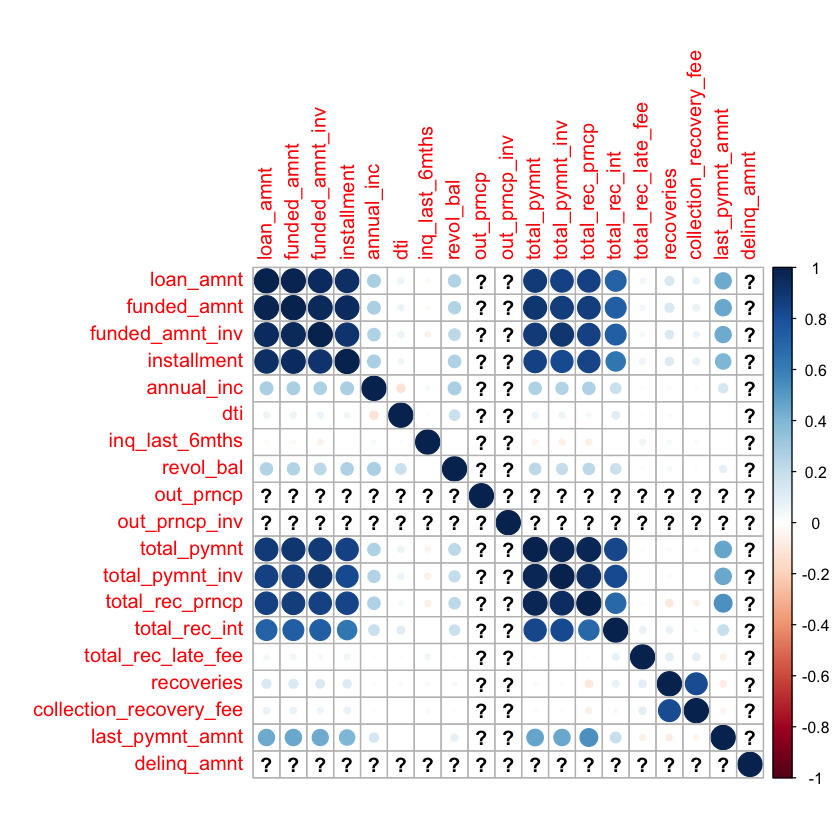

In [36]:
corrplot(M)

The above heat map shows the redudancy in the data. loan_amt, funded_amt, funded_amt_inv all give the same information. Similarly, total_pymnt, total_pymnt_inv, ttoal_rec_int all give the same information. All these redundant variables can be removed. 

Another point to note is the '?' on out_prncp, out_prncp_inv, delinq_amt. Let's dig deeper there and see if those variables contain meaningful data or not.

In [37]:
#removing redundancies
redundant <-c('funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int')
df_numerics <- as.data.frame(df_numerics)
df_numerics <- df_numerics[, !(names(df_numerics) %in% redundant)] 
df <- df[, !(names(df) %in% redundant)]

In [38]:
str(df)

'data.frame':	41164 obs. of  43 variables:
 $ loan_amnt               : int  5000 2500 2400 10000 3000 5000 7000 3000 5600 5375 ...
 $ term                    : Factor w/ 3 levels ""," 36 months",..: 2 3 2 2 3 2 3 2 3 3 ...
 $ int_rate                : Factor w/ 395 levels "","  5.42%","  5.79%",..: 80 223 241 162 137 30 241 324 372 137 ...
 $ grade                   : Factor w/ 8 levels "","A","B","C",..: 3 4 4 4 3 2 4 6 7 3 ...
 $ sub_grade               : Factor w/ 36 levels "","A1","A2","A3",..: 8 15 16 12 11 5 16 22 28 11 ...
 $ emp_title               : Factor w/ 30661 levels "","  old palm inc",..: 1 22922 1 791 28234 28965 24627 17778 1 25138 ...
 $ emp_length              : Factor w/ 13 levels "","< 1 year",..: 4 2 4 4 3 6 11 12 7 2 ...
 $ home_ownership          : Factor w/ 6 levels "","MORTGAGE",..: 6 6 6 6 6 6 6 6 5 6 ...
 $ annual_inc              : num  24000 30000 12252 49200 80000 ...
 $ verification_status     : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 1 2 2 2 ...
 $ is

In [39]:
summary(df$out_prncp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In [40]:
summary(df$out_prncp_inv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In [41]:
summary(df$delinq_amnt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Well, the special '?' variables don't have any data at all in them. All 0! Clearing them off too.  

In [42]:
more.waste <- c('out_prncp', 'out_prncp_inv', 'delinq_amnt')
df_numerics <- df_numerics[, !(names(df_numerics) %in% more.waste)]
df <- df[, !(names(df) %in% more.waste)]

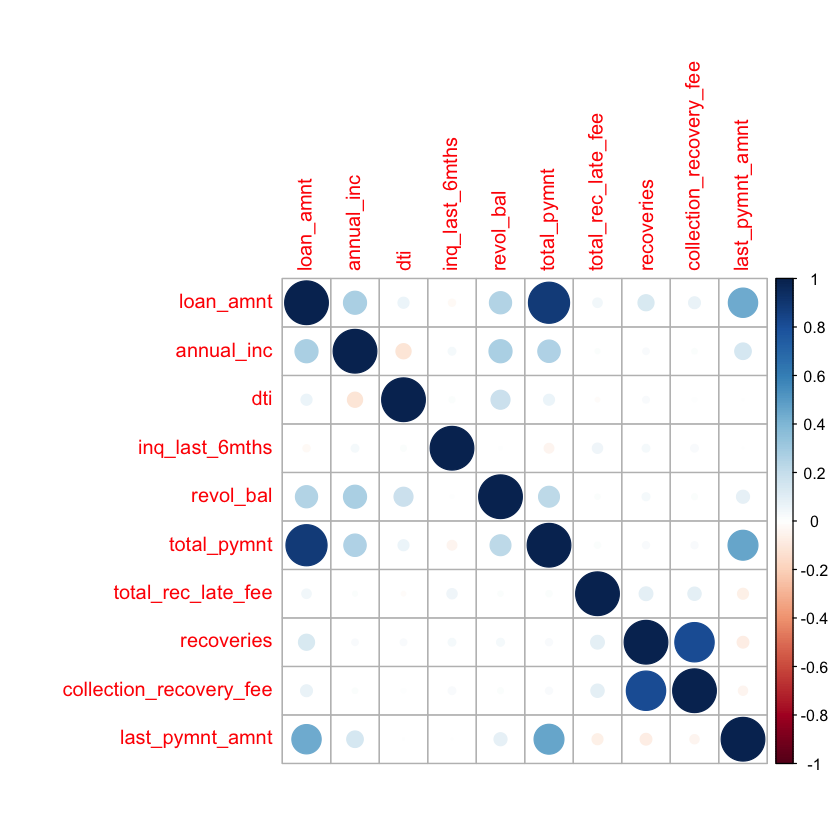

In [43]:
corrplot(cor(df_numerics))

Excellent! The above correlation plot looks much nice and relevant in modeling our problem. Let's move onto the Factors now and clean them up as well!

In [44]:
#making a seperate factors data frame
df_factors <- subset(df, select = factor_vars)

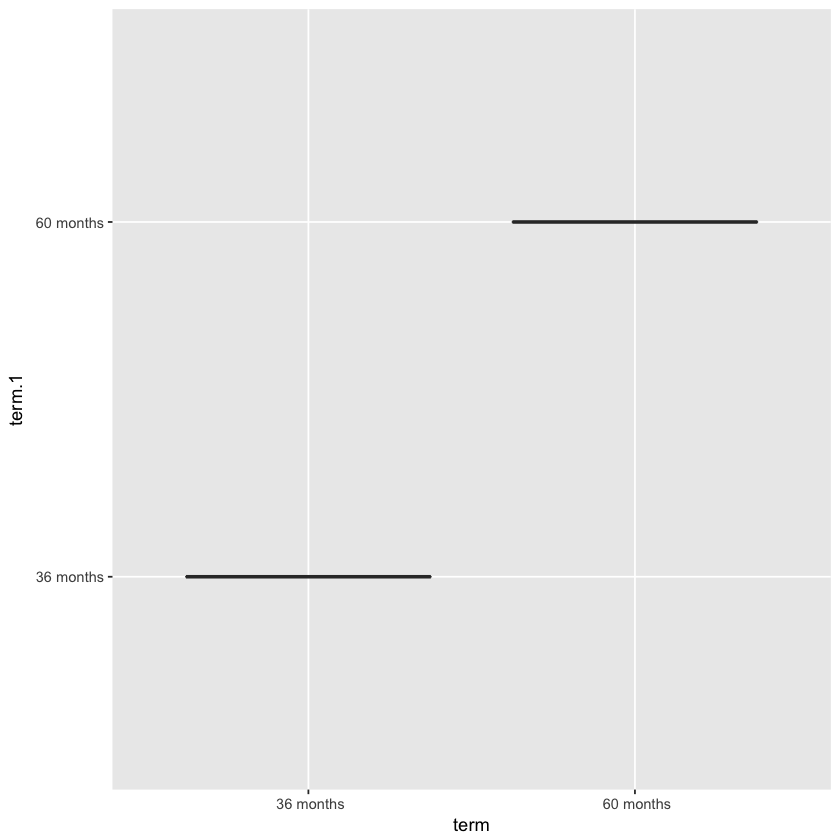

In [45]:
library(ggplot2)
ggplot(df_factors, aes(term, term.1)) + geom_boxplot()
#Shows that term and term.1 are the same. 

In [46]:
#From the description and after looking at the values, emp_title won't be of much help too.
ridoff <- c('term.1', 'sub_grade', 'emp_title', 'emp_length', 'desc', 'title', 'zip_code', 
            'addr_state', 'last_pymnt_d', 'next_pymnt_d', 'debt_settlement_flag', 'policy_code',
            'acc_now_delinq', 'chargeoff_within_12_mths', 'tax_liens')

In [47]:
#removing ridoffs
df_factors<- df_factors[, !(names(df_factors) %in% ridoff)]          
df <- df[, !(names(df) %in% ridoff)]

In [48]:
#converting % to numerics
df_factors$int_rate<- as.numeric(sub("%", "", df_factors$int_rate))
df$int_rate <- as.numeric(sub("%", "", df$int_rate))

df_factors$revol_util<- as.numeric(sub("%","", df_factors$revol_util))
df$revol_util <- as.numeric(sub("%","", df$revol_util))

In [49]:
#changing the date columns to appropriate type and then calculating the difference between todays date and 
#the date columns to include in the model

df_factors$issue_d <- as.Date(gsub("^", "01-", df_factors$issue_d), format = "%d-%b-%Y")
df$issue_d <- as.Date(gsub("^", "01-", df$issue_d), format = "%d-%b-%Y")
x <- Sys.Date() - df_factors$issue_d
x <- as.numeric(x)
df_factors$days_since_issued <- x
df$days_since_issued <- x

df_factors$earliest_cr_line <- as.Date(gsub("^", "01-", df_factors$earliest_cr_line), format = "%d-%b-%Y")
df$earliest_cr_line <- as.Date(gsub("^", "01-", df$earliest_cr_line), format = "%d-%b-%Y")
y <- Sys.Date() - df_factors$earliest_cr_line
y <- as.numeric(y)
df_factors$earliest_cr_line_days <- y 
df$earliest_cr_line_days <- y

df_factors$last_credit_pull_d <- as.Date(gsub("^", "01-", df_factors$last_credit_pull_d), format = "%d-%b-%Y")
df$last_credit_pull_d <- as.Date(gsub("^", "01-", df$last_credit_pull_d), format = "%d-%b-%Y")
z <- Sys.Date() - df_factors$last_credit_pull_d
z <- as.numeric(z)
df_factors$last_credit_pull_days <- z
df$last_credit_pull_days <- z

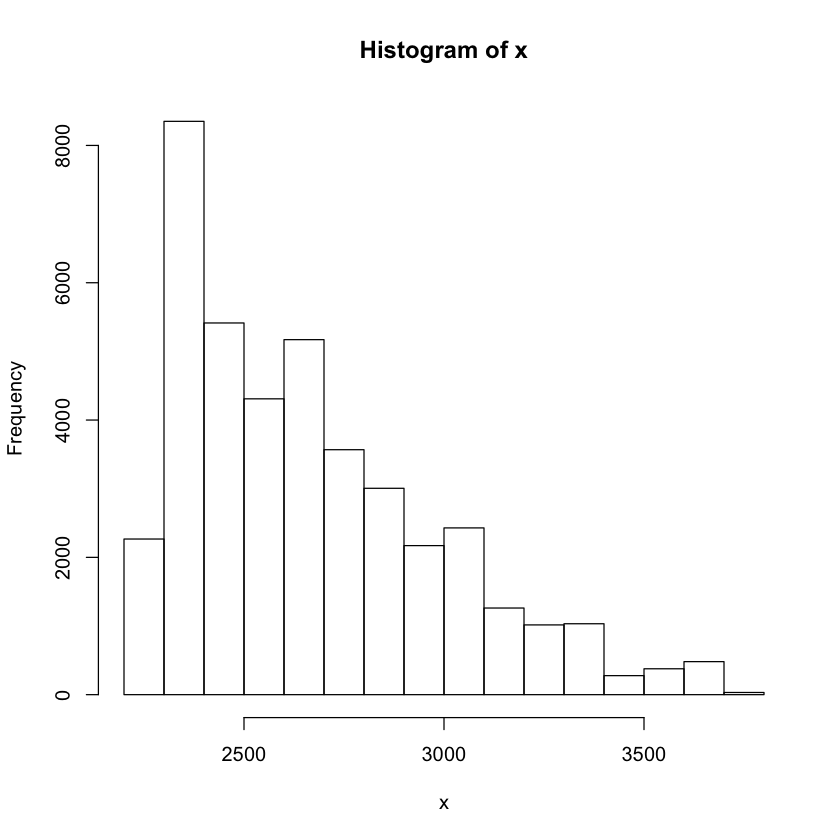

In [50]:
hist(x)

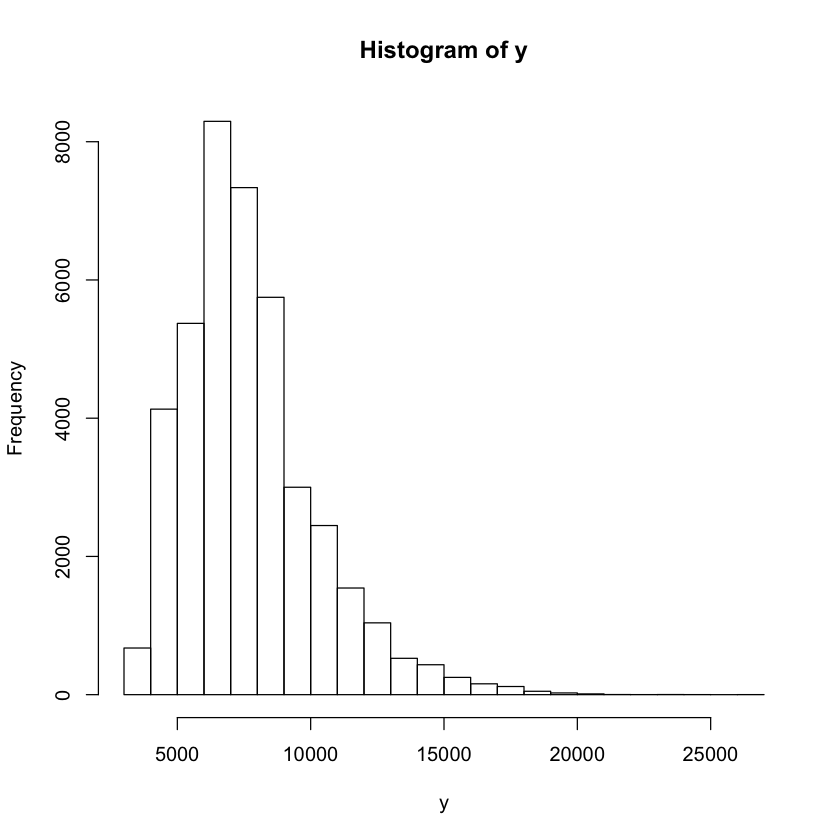

In [51]:
hist(y)

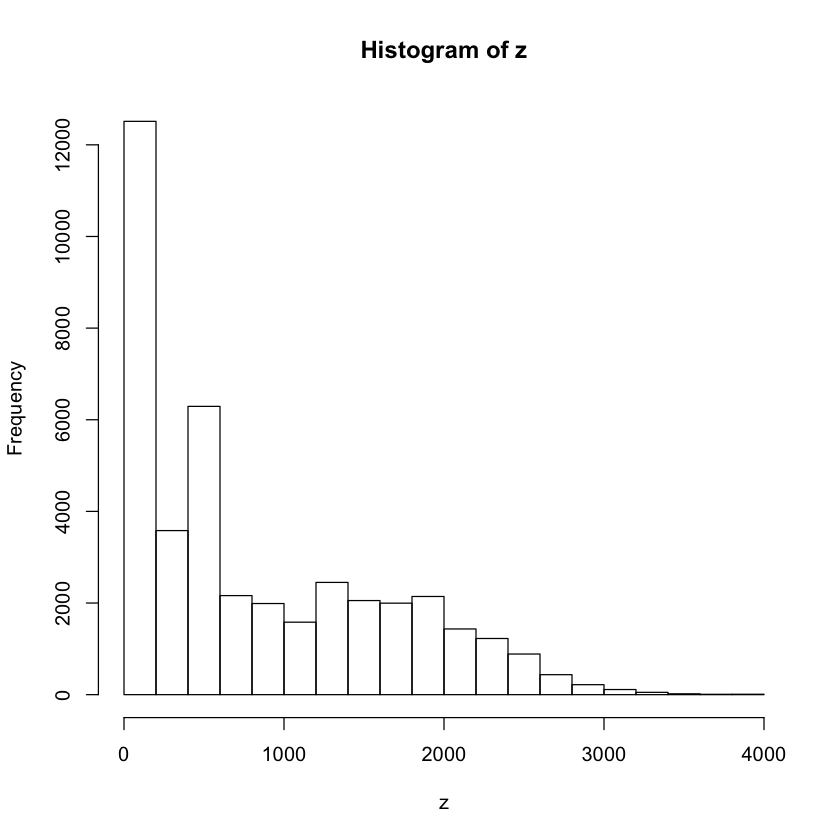

In [52]:
hist(z)

In [53]:
df$open_acc <- as.integer(df$open_acc)
df$total_acc <- as.integer(df$total_acc)
df <- na.omit(df)
df_factors <- na.omit(df_factors)

final_removal <- c('issue_d', 'earliest_cr_line', 'recoveries', 'collection_recovery_fee', 
                   'last_credit_pull_d')

df <- df[, !(names(df) %in% final_removal)]
df_factors <- df_factors[, !(names(df_factors) %in% final_removal)]

In [54]:
summary(df)

   loan_amnt             term          int_rate         grade      
 Min.   :  500             :    0   Min.   : 5.42   B      :12092  
 1st Qu.: 5400    36 months:30108   1st Qu.: 9.62   A      :10013  
 Median : 9950    60 months:10997   Median :11.99   C      : 8427  
 Mean   :11161                      Mean   :12.17   D      : 5759  
 3rd Qu.:15000                      3rd Qu.:14.74   E      : 3180  
 Max.   :35000                      Max.   :24.59   F      : 1196  
                                                    (Other):  438  
  home_ownership    annual_inc      verification_status loan_status
         :    0   Min.   :   3300   0:17355             0: 6078    
 MORTGAGE:18471   1st Qu.:  40800   1:23750             1:35027    
 NONE    :    0   Median :  59100                                  
 OTHER   :  134   Mean   :  69284                                  
 OWN     : 3131   3rd Qu.:  83000                                  
 RENT    :19369   Max.   :6000000               

Finally, our data is nice and clean and is hopefully ready to go inside a model.

In [55]:
#changind loan_status to repay_status
names(df)[8] <- "repay_status"

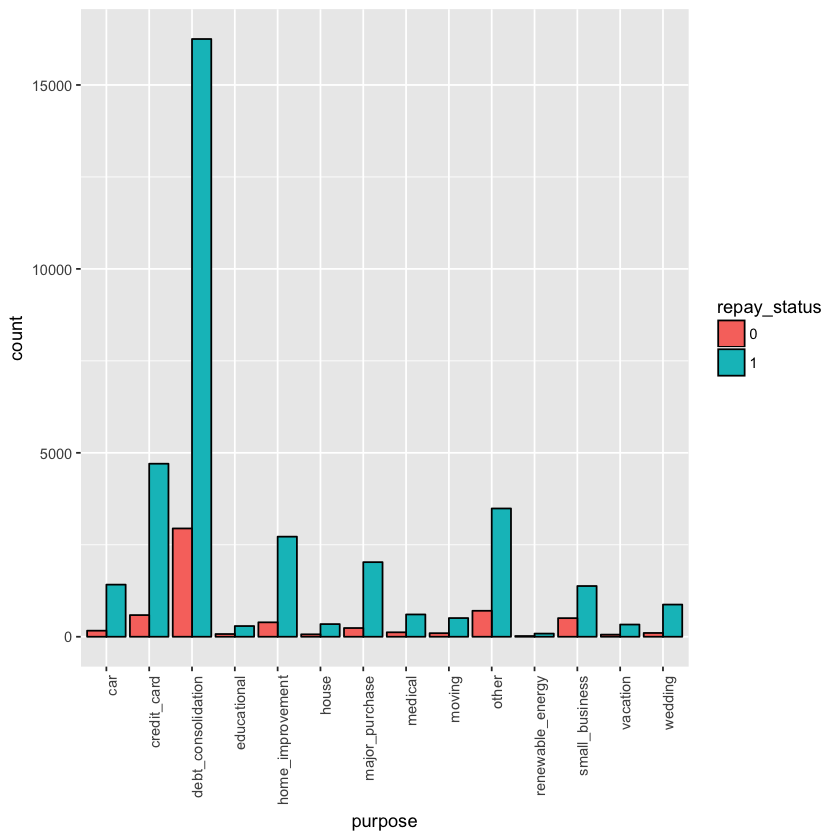

In [56]:
p1 <-ggplot(df, aes(purpose)) + geom_bar(aes(fill = repay_status), color = 'black', position = position_dodge())
p1 + theme(axis.text.x = element_text(angle = 90, hjust = 1))

Debt-consolidation seems to be the top purpose for borrowing money. Defaulters the most in the same class too
followed by credit_card, other reasons, home_improvement and small_business. 

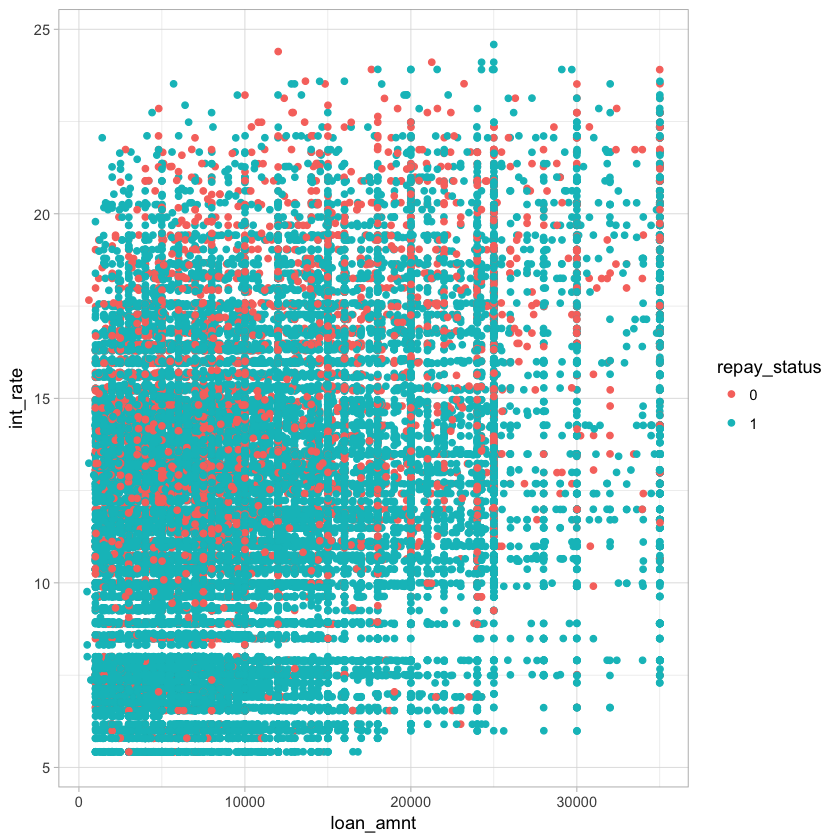

In [57]:
ggplot(df, aes(loan_amnt, int_rate)) + geom_point(aes(color = repay_status), position = position_jitter()) + theme_light()

No clear pattern of defaulters with loan_amnt or interest rate.

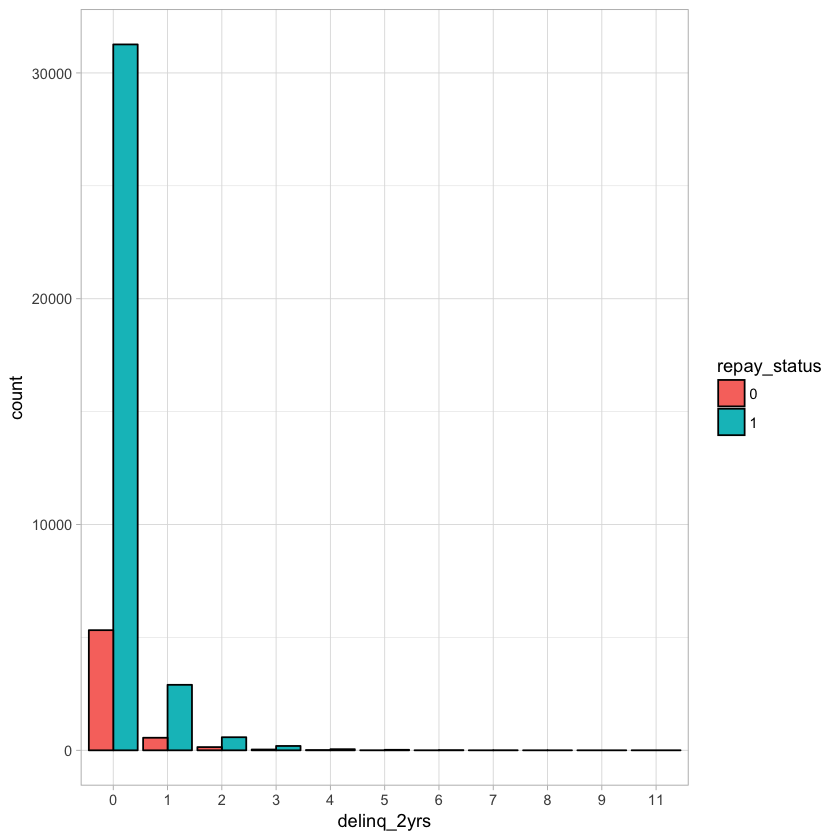

In [58]:
ggplot(df, aes(delinq_2yrs)) + geom_bar(aes(fill=repay_status), color= 'black', position = position_dodge()) + theme_light()

A good delinqunicy record does not mean the person might not defualt! Also, it can be said that we don't have enough records of more delinquent people (which is nice!).

## Model building and performance evalutaion.

In [59]:
library(caTools) #to split the data into test and training sets
library(randomForest) #for random forest
library(e1071) #for support vector machines

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Let's try out three different algorithms (below) and see which one identifies the fradulent cases the best.

1. Logistic Regression
2. Random Forest
3. Support Vector Machines

### 1. Logistic Regression

In [60]:
#split the data into test and training sets.set.seed(101)
split <- sample.split(df, SplitRatio = 0.7)
train <- subset(df, split == TRUE)
test <- subset(df, split == FALSE)


summary(train) #to evaluate if the test set contains enough fradulent records.

   loan_amnt             term          int_rate         grade     
 Min.   :  500             :    0   Min.   : 5.42   B      :8120  
 1st Qu.: 5400    36 months:20062   1st Qu.: 9.62   A      :6652  
 Median : 9800    60 months: 7343   Median :11.99   C      :5595  
 Mean   :11152                      Mean   :12.17   D      :3814  
 3rd Qu.:15000                      3rd Qu.:14.74   E      :2125  
 Max.   :35000                      Max.   :24.11   F      : 814  
                                                    (Other): 285  
  home_ownership    annual_inc      verification_status repay_status
         :    0   Min.   :   4080   0:11676             0: 4065     
 MORTGAGE:12245   1st Qu.:  40116   1:15729             1:23340     
 NONE    :    0   Median :  58608                                   
 OTHER   :   92   Mean   :  68818                                   
 OWN     : 2092   3rd Qu.:  82000                                   
 RENT    :12976   Max.   :1900000                 

In [61]:
test_predictions <- test$repay_status
test <- test[-c(8)]
summary(test)

   loan_amnt             term          int_rate         grade     
 Min.   :  500             :    0   Min.   : 5.42   B      :3972  
 1st Qu.: 5344    36 months:10046   1st Qu.: 9.62   A      :3361  
 Median :10000    60 months: 3654   Median :11.99   C      :2832  
 Mean   :11177                      Mean   :12.17   D      :1945  
 3rd Qu.:15000                      3rd Qu.:14.74   E      :1055  
 Max.   :35000                      Max.   :24.59   F      : 382  
                                                    (Other): 153  
  home_ownership   annual_inc      verification_status
         :   0   Min.   :   3300   0:5679             
 MORTGAGE:6226   1st Qu.:  41259   1:8021             
 NONE    :   0   Median :  60000                      
 OTHER   :  42   Mean   :  70216                      
 OWN     :1039   3rd Qu.:  84000                      
 RENT    :6393   Max.   :6000000                      
                                                      
               purpose  

Nice, the ration of fraud cases to normal cases is pretty much the same as in the original data set. Let's go ahead with this and build out our models. 

In [62]:
# logistic regression build
logitmodel <- glm(repay_status ~., family = binomial(link = logit), data = train)
summary(logitmodel)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = repay_status ~ ., family = binomial(link = logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7927   0.0012   0.0695   0.2305   5.3676  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                2.639e+00  4.985e-01   5.295 1.19e-07 ***
loan_amnt                 -8.716e-04  1.754e-05 -49.690  < 2e-16 ***
term 60 months            -7.942e-01  8.722e-02  -9.106  < 2e-16 ***
int_rate                  -2.865e-01  3.322e-02  -8.624  < 2e-16 ***
gradeB                     1.540e-01  1.532e-01   1.005  0.31482    
gradeC                     3.784e-01  2.302e-01   1.644  0.10023    
gradeD                     2.568e-01  2.934e-01   0.875  0.38149    
gradeE                     5.401e-01  3.580e-01   1.509  0.13133    
gradeF                     2.884e-01  4.475e-01   0.645  0.51917    
gradeG                     6.633e-01  5.565e-01   1.192  0.23328    
home_ownershipOTHER  

Since there are way too many categories associated to factors, too many variables are there in the model. Let's use the step function to automatically reduce insignificant variables. 

In [63]:
new.logit.model <- step(logitmodel)

Start:  AIC=7368.87
repay_status ~ loan_amnt + term + int_rate + grade + home_ownership + 
    annual_inc + verification_status + purpose + dti + delinq_2yrs + 
    inq_last_6mths + open_acc + pub_rec + revol_bal + revol_util + 
    total_acc + total_pymnt + total_rec_late_fee + last_pymnt_amnt + 
    pub_rec_bankruptcies + days_since_issued + earliest_cr_line_days + 
    last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- delinq_2yrs           10   7265.7  7357.7
- home_ownership         3   7258.2  7364.2
- grade                  6   7265.2  7365.2
- pub_rec_bankruptcies   2   7257.8  7365.8
- pub_rec                4   7262.2  7366.2
- open_acc               1   7256.9  7366.9
- revol_bal              1   7257.9  7367.9
- revol_util             1   7257.9  7367.9
- total_acc              1   7258.3  7368.3
<none>                       7256.9  7368.9
- purpose               13   7283.0  7369.0
- verification_status    1   7259.1  7369.1
- inq_last_6mths         1   7261.8  7371.8
- annual_inc             1   7262.6  7372.6
- earliest_cr_line_days  1   7263.1  7373.1
- dti                    1   7263.4  7373.4
- days_since_issued      1   7278.6  7388.6
- int_rate               1   7332.2  7442.2
- term                   1   7338.3  7448.3
- total_rec_late_fee     1   7528.1  7638.1
- last_credit_pull_days  1   7826.7  7936.7
- last_pymnt_amnt        1   915

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7357.66
repay_status ~ loan_amnt + term + int_rate + grade + home_ownership + 
    annual_inc + verification_status + purpose + dti + inq_last_6mths + 
    open_acc + pub_rec + revol_bal + revol_util + total_acc + 
    total_pymnt + total_rec_late_fee + last_pymnt_amnt + pub_rec_bankruptcies + 
    days_since_issued + earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- home_ownership         3   7266.8  7352.8
- grade                  6   7274.2  7354.2
- pub_rec_bankruptcies   2   7266.5  7354.5
- pub_rec                4   7271.1  7355.1
- open_acc               1   7265.7  7355.7
- revol_bal              1   7266.5  7356.5
- revol_util             1   7266.5  7356.5
- total_acc              1   7267.2  7357.2
<none>                       7265.7  7357.7
- purpose               13   7291.8  7357.8
- verification_status    1   7267.9  7357.9
- inq_last_6mths         1   7271.1  7361.1
- annual_inc             1   7271.3  7361.3
- earliest_cr_line_days  1   7271.6  7361.6
- dti                    1   7272.1  7362.1
- days_since_issued      1   7287.8  7377.8
- int_rate               1   7341.1  7431.1
- term                   1   7348.0  7438.0
- total_rec_late_fee     1   7534.9  7624.9
- last_credit_pull_days  1   7832.2  7922.2
- last_pymnt_amnt        1   9169.6  9259.6
- loan_amnt              1  1341

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7352.85
repay_status ~ loan_amnt + term + int_rate + grade + annual_inc + 
    verification_status + purpose + dti + inq_last_6mths + open_acc + 
    pub_rec + revol_bal + revol_util + total_acc + total_pymnt + 
    total_rec_late_fee + last_pymnt_amnt + pub_rec_bankruptcies + 
    days_since_issued + earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- grade                  6   7275.3  7349.3
- pub_rec_bankruptcies   2   7267.7  7349.7
- pub_rec                4   7272.4  7350.4
- open_acc               1   7266.9  7350.9
- revol_bal              1   7267.5  7351.5
- revol_util             1   7267.8  7351.8
- total_acc              1   7268.0  7352.0
<none>                       7266.8  7352.8
- purpose               13   7292.9  7352.9
- verification_status    1   7269.2  7353.2
- annual_inc             1   7272.1  7356.1
- inq_last_6mths         1   7272.6  7356.6
- earliest_cr_line_days  1   7273.2  7357.2
- dti                    1   7273.2  7357.2
- days_since_issued      1   7289.2  7373.2
- int_rate               1   7341.9  7425.9
- term                   1   7350.5  7434.5
- total_rec_late_fee     1   7536.2  7620.2
- last_credit_pull_days  1   7832.7  7916.7
- last_pymnt_amnt        1   9170.5  9254.5
- loan_amnt              1  13422.8 13506.8
- total_pymnt            1  1541

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7349.33
repay_status ~ loan_amnt + term + int_rate + annual_inc + verification_status + 
    purpose + dti + inq_last_6mths + open_acc + pub_rec + revol_bal + 
    revol_util + total_acc + total_pymnt + total_rec_late_fee + 
    last_pymnt_amnt + pub_rec_bankruptcies + days_since_issued + 
    earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- pub_rec_bankruptcies   2   7276.2  7346.2
- pub_rec                4   7280.9  7346.9
- open_acc               1   7275.4  7347.4
- revol_bal              1   7276.0  7348.0
- total_acc              1   7276.4  7348.4
- revol_util             1   7276.5  7348.5
<none>                       7275.3  7349.3
- purpose               13   7301.4  7349.4
- verification_status    1   7277.8  7349.8
- inq_last_6mths         1   7280.6  7352.6
- annual_inc             1   7281.1  7353.1
- dti                    1   7281.3  7353.3
- earliest_cr_line_days  1   7281.6  7353.6
- days_since_issued      1   7307.6  7379.6
- term                   1   7358.8  7430.8
- total_rec_late_fee     1   7543.1  7615.1
- int_rate               1   7745.4  7817.4
- last_credit_pull_days  1   7841.6  7913.6
- last_pymnt_amnt        1   9176.8  9248.8
- loan_amnt              1  13442.3 13514.3
- total_pymnt            1  15424.9 15496.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7346.22
repay_status ~ loan_amnt + term + int_rate + annual_inc + verification_status + 
    purpose + dti + inq_last_6mths + open_acc + pub_rec + revol_bal + 
    revol_util + total_acc + total_pymnt + total_rec_late_fee + 
    last_pymnt_amnt + days_since_issued + earliest_cr_line_days + 
    last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- open_acc               1   7276.3  7344.3
- revol_bal              1   7276.9  7344.9
- total_acc              1   7277.4  7345.4
- revol_util             1   7277.5  7345.5
<none>                       7276.2  7346.2
- purpose               13   7302.3  7346.3
- verification_status    1   7278.7  7346.7
- pub_rec                4   7285.3  7347.3
- inq_last_6mths         1   7281.4  7349.4
- annual_inc             1   7281.9  7349.9
- dti                    1   7282.2  7350.2
- earliest_cr_line_days  1   7282.4  7350.4
- days_since_issued      1   7308.3  7376.3
- term                   1   7359.4  7427.4
- total_rec_late_fee     1   7543.9  7611.9
- int_rate               1   7748.0  7816.0
- last_credit_pull_days  1   7842.8  7910.8
- last_pymnt_amnt        1   9177.8  9245.8
- loan_amnt              1  13442.3 13510.3
- total_pymnt            1  15425.0 15493.0


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7344.26
repay_status ~ loan_amnt + term + int_rate + annual_inc + verification_status + 
    purpose + dti + inq_last_6mths + pub_rec + revol_bal + revol_util + 
    total_acc + total_pymnt + total_rec_late_fee + last_pymnt_amnt + 
    days_since_issued + earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- revol_bal              1   7276.9  7342.9
- revol_util             1   7277.5  7343.5
<none>                       7276.3  7344.3
- purpose               13   7302.3  7344.3
- total_acc              1   7278.5  7344.5
- verification_status    1   7278.7  7344.7
- pub_rec                4   7285.3  7345.3
- inq_last_6mths         1   7281.4  7347.4
- annual_inc             1   7282.0  7348.0
- dti                    1   7282.3  7348.3
- earliest_cr_line_days  1   7282.6  7348.6
- days_since_issued      1   7308.3  7374.3
- term                   1   7359.9  7425.9
- total_rec_late_fee     1   7544.1  7610.1
- int_rate               1   7752.9  7818.9
- last_credit_pull_days  1   7842.8  7908.8
- last_pymnt_amnt        1   9183.2  9249.2
- loan_amnt              1  13455.2 13521.2
- total_pymnt            1  15432.6 15498.6


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7342.94
repay_status ~ loan_amnt + term + int_rate + annual_inc + verification_status + 
    purpose + dti + inq_last_6mths + pub_rec + revol_util + total_acc + 
    total_pymnt + total_rec_late_fee + last_pymnt_amnt + days_since_issued + 
    earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
- revol_util             1   7278.8  7342.8
- purpose               13   7302.8  7342.8
<none>                       7276.9  7342.9
- verification_status    1   7279.4  7343.4
- total_acc              1   7279.6  7343.6
- pub_rec                4   7286.4  7344.4
- inq_last_6mths         1   7282.1  7346.1
- dti                    1   7282.4  7346.4
- earliest_cr_line_days  1   7282.9  7346.9
- annual_inc             1   7284.4  7348.4
- days_since_issued      1   7310.4  7374.4
- term                   1   7360.3  7424.3
- total_rec_late_fee     1   7545.2  7609.2
- int_rate               1   7759.7  7823.7
- last_credit_pull_days  1   7843.1  7907.1
- last_pymnt_amnt        1   9183.2  9247.2
- loan_amnt              1  13516.8 13580.8
- total_pymnt            1  15442.9 15506.9


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=7342.77
repay_status ~ loan_amnt + term + int_rate + annual_inc + verification_status + 
    purpose + dti + inq_last_6mths + pub_rec + total_acc + total_pymnt + 
    total_rec_late_fee + last_pymnt_amnt + days_since_issued + 
    earliest_cr_line_days + last_credit_pull_days



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

                        Df Deviance     AIC
<none>                       7278.8  7342.8
- total_acc              1   7280.9  7342.9
- purpose               13   7305.0  7343.0
- verification_status    1   7281.2  7343.2
- pub_rec                4   7288.2  7344.2
- dti                    1   7283.0  7345.0
- earliest_cr_line_days  1   7284.3  7346.3
- inq_last_6mths         1   7285.2  7347.2
- annual_inc             1   7287.7  7349.7
- days_since_issued      1   7311.5  7373.5
- term                   1   7367.5  7429.5
- total_rec_late_fee     1   7546.5  7608.5
- last_credit_pull_days  1   7843.2  7905.2
- int_rate               1   7852.1  7914.1
- last_pymnt_amnt        1   9183.3  9245.3
- loan_amnt              1  13523.7 13585.7
- total_pymnt            1  15445.2 15507.2


In [64]:
summary(new.logit.model)


Call:
glm(formula = repay_status ~ loan_amnt + term + int_rate + annual_inc + 
    verification_status + purpose + dti + inq_last_6mths + pub_rec + 
    total_acc + total_pymnt + total_rec_late_fee + last_pymnt_amnt + 
    days_since_issued + earliest_cr_line_days + last_credit_pull_days, 
    family = binomial(link = logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.8264   0.0012   0.0697   0.2316   5.3914  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                2.250e+00  3.486e-01   6.455 1.08e-10 ***
loan_amnt                 -8.685e-04  1.738e-05 -49.974  < 2e-16 ***
term 60 months            -8.005e-01  8.418e-02  -9.509  < 2e-16 ***
int_rate                  -2.412e-01  1.055e-02 -22.871  < 2e-16 ***
annual_inc                 2.891e-06  1.011e-06   2.860  0.00423 ** 
verification_status1       1.022e-01  6.605e-02   1.548  0.12159    
purposecredit_card         3.057e-02  1.813e-

Excellent! This looks to be a much parsimoniuos model. Let's use this and make predictions on the test set. 

In [65]:
newlogit.predictions <- predict(new.logit.model, test, type = 'response')
logit.fitted <- ifelse(newlogit.predictions > 0.5, 1, 0)

In [66]:
#classification matrix
table(test_predictions, logit.fitted)

                logit.fitted
test_predictions     0     1
               0  1526   487
               1   160 11527

In [109]:
#accuracy and sensitivity towards identifying the defaulters
logit.acc <- (1526 + 11527)/(1526 + 11527 + 160 + 487)
logit.sens <- (1526) / (1526 + 487)

In [110]:
logit.acc*100

[1] 95.27737

In [111]:
logit.sens*100

[1] 75.80725

Nice. The overall accuracy of the model is excellent at about 95 %. Although, the sensitivity towards detecting fraudulent cases is about 76% (can be improved?). Let's go ahead and build out a random forest and svm model and see if the sensitivity imporves. 

### 2. Random Forest

In [70]:
#model build
rfmodel <- randomForest(repay_status ~. , data = train, importance = TRUE)

In [71]:
#looking at the model
rfmodel


Call:
 randomForest(formula = repay_status ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.26%
Confusion matrix:
     0     1 class.error
0 3306   759 0.186715867
1  134 23206 0.005741217

In [72]:
#predictions
rfpredictions <- predict(rfmodel, test)

In [73]:
table(test_predictions, rfpredictions)

                rfpredictions
test_predictions     0     1
               0  1639   374
               1    67 11620

In [98]:
#accuracy and sensitivity
rf.sensitivity <- 1639 / (1639+374)
rf.accuracy <- (1639 + 11620)/(1639 + 11620 + 67 + 374)

In [99]:
rf.sensitivity*100

[1] 81.42077

In [100]:
rf.accuracy*100

[1] 96.78102

Better accuracy and sensitivity as compared to logistic regression! Let's try out SVM and see if the results improve any further. 

### 3. Support Vector Machines

In [77]:
#Build the model.
svm.model <- svm(repay_status ~. , data = train)

In [78]:
#sneak peak into the model. 
summary(svm.model)


Call:
svm(formula = repay_status ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01639344 

Number of Support Vectors:  4389

 ( 2269 2120 )


Number of Classes:  2 

Levels: 
 0 1




NOTE: We can see that R uses the radial kernal as default and the cost and gamma values are 1 and 0.01639.

In [79]:
#predcitions
svm.predictions <- predict(svm.model, test)

In [80]:
#classification matrix
table(test_predictions, svm.predictions)

                svm.predictions
test_predictions     0     1
               0  1430   583
               1    81 11606

In [108]:
svm.sensitivity <- 1430 / (1430 + 583)
svm.sensitivity*100

[1] 71.03825

We can see that the sensitivity of this basic model is lesser as compared to Random Forests. Let's try to tune the mdoel to improve the accuracy of this model. 

The parameters that we can play with are Cost(c) and Gamma(γ). 

Cost parameter trades off missclassification of training examples against simplicity of the decision surface. Higher c values leads towards a hard margin and lower c values makes the decision surface smoother. 

Gamma defines how far the influence of a single training sample reaches, with low values meaning far and high values meaning close. 

In [117]:
for(i in c(2,5,10)){
    for(j in c(0.015, 0.02, 0.025)){
        svm.model <- svm(repay_status ~. , data = train, kernel = 'radial', cost = i, gamma = j)
        print('gamma'); print(j); print('Cost'); print(i)
        print(table(test_predictions, predict(svm.model, test)))
    }
}

[1] "gamma"
[1] 0.015
[1] "Cost"
[1] 2
                
test_predictions     0     1
               0  1493   520
               1    89 11598
[1] "gamma"
[1] 0.02
[1] "Cost"
[1] 2
                
test_predictions     0     1
               0  1512   501
               1    94 11593
[1] "gamma"
[1] 0.025
[1] "Cost"
[1] 2
                
test_predictions     0     1
               0  1529   484
               1    97 11590
[1] "gamma"
[1] 0.015
[1] "Cost"
[1] 5
                
test_predictions     0     1
               0  1563   450
               1   102 11585
[1] "gamma"
[1] 0.02
[1] "Cost"
[1] 5
                
test_predictions     0     1
               0  1575   438
               1   107 11580
[1] "gamma"
[1] 0.025
[1] "Cost"
[1] 5
                
test_predictions     0     1
               0  1588   425
               1   103 11584
[1] "gamma"
[1] 0.015
[1] "Cost"
[1] 10
                
test_predictions     0     1
               0  1606   407
               1   106 11581


c = 10 and gamma = 0.025 gives the highest sensitivity! The trend observed in that the higher the c value, higher the rate of identifying fraudulent cases. Although, the more the c value, the harder the hard margin (i.e. the penalty associated with missclassifying a record). Hence, increasing c even more might lead to over-fitting of the model. 

In [118]:
tuned.svm.sensitivity <- (1633)/(1633+380)
tuned.svm.accuracy <- (1633 + 11577)/(1633 + 11577 + 110 + 380)

In [119]:
tuned.svm.sensitivity*100

[1] 81.1227

In [120]:
tuned.svm.accuracy*100

[1] 96.42336

Conclusion:

The logistic regression model helps build a basic model to classify non-fraudulent and fradulent cases. USing the step function, we get an idea of which variables of our cleaned dataset are the most relevant. 

The Random Forest and SVM models fit the data pretty well. With a sensitivity towards identifying fraudulent cases of around 81%, we can go with either model to get a good predicitve accuracy. 